In [1]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
# Load the model without the top (fully connected) layers
base_model =  ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
base_model.trainable = True

# Freeze all layers except the last 30
for layer in base_model.layers[:-30]:
    layer.trainable = False

In [4]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout

# Flatten the output of the convolutional base
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)  # Add dropout to reduce overfitting
x = Dense(4, activation='softmax')(x) 

# Create the new model
model = Model(inputs=base_model.input, outputs=x)


In [5]:
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy',  # Multi-class classification
    metrics=['accuracy']
)

In [6]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 49,279,108 (187.98 MB)

 Trainable params: 40,141,572 (153.13 MB)

 Non-trainable params: 9,137,536 (34.86 MB)

In [7]:

print(f"Total layers in Resnet50: {len(model.layers)}")

Total layers in Resnet50: 179


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input

# Augmented training data generator
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.2,
    brightness_range=(0.7, 1.3),
    horizontal_flip=True,
    fill_mode='nearest'
)

# No augmentation for validation and test sets (only preprocessing)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Load Training Data with augmentation
train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/soil-image-classification/train_data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Load Validation Data (no augmentation)
val_generator = val_datagen.flow_from_directory(
    '/kaggle/input/soil-image-classification/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 343 images belonging to 4 classes.
Found 158 images belonging to 4 classes.


In [9]:
#Train the Model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15
)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


11/11 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.5018 - loss: 12.6668 - val_accuracy: 0.7215 - val_loss: 90.1033
Epoch 2/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 304ms/step - accuracy: 0.7924 - loss: 3.5735 - val_accuracy: 0.3671 - val_loss: 54114.7578
Epoch 3/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 295ms/step - accuracy: 0.8121 - loss: 2.3166 - val_accuracy: 0.2785 - val_loss: 102053.3203
Epoch 4/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 299ms/step - accuracy: 0.8402 - loss: 0.6857 - val_accuracy: 0.2785 - val_loss: 42787.5586
Epoch 5/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 301ms/step - accuracy: 0.8694 - loss: 0.4600 - val_accuracy: 0.3228 - val_loss: 14241.3418
Epoch 6/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 312ms/step - accuracy: 0.8885 - loss: 0.4137 - val_accuracy: 0.3671 - val_loss: 5499.9697
Epoch 7/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 296ms/step - accuracy: 0.8760 - loss: 0.4073 - val_accuracy: 0.6519 - val_loss: 1103.0227
Epoch 8/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 295ms/step - accuracy: 0.9478 - loss: 0.1269 - val_

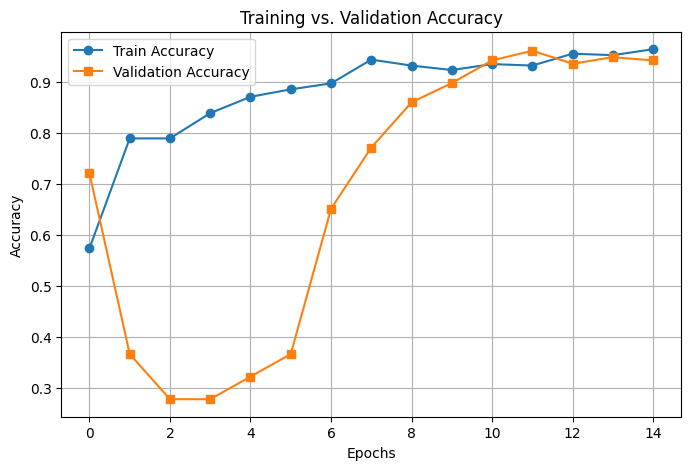

In [11]:
# Plot Training & Validation Accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()